# <center> Practice Case 5 and 6
## <center> Supervised and Unsupervised Learning: Employee Dataset
<img src="https://www.sccpre.cat/mypng/full/163-1630978_happy-employee-cartoon-bing-images-clipart-png-download.png" alt="employee" width="400"/>
Here in this notebook, we are going to discuss an employee dataset. The data is acquired by trainer of IYKRA Learning Institute and this notebook is a part of training practice case.
    
    Author: Tri Juliansyah Muharam Sambas
    Date: 11th November 2019

## Outline
- Executive Summary
- Importing Libraries
- Importing Dataset
- Data Cleaning & Feature Engineering
    * Missing Values
    * Duplicated Entries
- Exploratory Data Analysis
- Model & Evaluation
    * Supervised Learning
        - K-Nearest Neighbors
        - Logistic Regression
        - Random Forest
        - XGBoost
        - Stacking Model
    * Conclusion on Supervised Learning
    * Unsupervised Learning
        - K-Means Clustering
        - Hierachical Clustering
        - DBSCAN Algorithm
    * Conclusion on Unsupervised Learning

## TLDR; Executive Summary
* Supervised Learning
Using the label on the dataset, I developed 5 models of supervised learning. The summary of the results can be presented as a table below,

| Model               | AUC Score |
|---------------------|-----------|
| K-Nearest Neighbors | 0.9262    |
| Logistic Regression | 0.6753    |
| Random Forest       | 0.9601    |
| XGBoost             | 0.9656    |
| Stacked Model       | 0.9658    |

**_In general_**, all models perform quite well solely (**AUC score > 0.9**) except Logistic Regression (**AUC score < 0.7**). However, when I implemented **the logistic regression as the meta classifier** in stacked model, it outperforms all four models previously. Nevertheless, it is also important to note that I specified the seed on this notebook so that the results will be the same every time we run the notebook. In fact, the results could be different every time we run if the seed is unspecified. This happen due to the fact that, we only have a small dataset in which we **cannot fully examine the impact of more complex models** in generalizing the training dataset.

* Unsupervised Learning  
In this notebook, I developed the analysis of train + test dataset and make clusters of employees based on their satisfaction level and performance results. In general the results can be described in the table below.

| Model                   | Cluster 1 (22.87%) | Cluster 2 (23.82%) | Cluster 3 (22.00%) | Cluster 4 (19.47%) | Cluster 5 (11.84%) |
|-------------------------|--------------------|--------------------|--------------------|--------------------|--------------------|
| K-Means Clustering      | 0                  | 1                  | 4                  | 2                  | 3                  |
| Hierarchical Clustering | 3                  | 1                  | 0                  | 2                  | 4                  |
| DBSCAN Algorithm        | 2                  | 1                  | 3                  | 4                  | 0                  |

with the definition of each cluster:
- Cluster 1: Employees who have <span style="color:red"> **high** </span> satisfaction with the company and produce <span style="color:red"> **high** </span> level of results.
- Cluster 2: Employees who have <span style="color:blue"> **low** </span> satisfaction with the company and produce <span style="color:blue"> **low** </span> level of results.
- Cluster 3: Employees who have <span style="color:red"> **high** </span> satisfaction with the company but produce <span style="color:blue"> **low** </span> level of results.
- Cluster 4: Employees who have <span style="color:green"> **medium** </span> satisfaction with the company and produce <span style="color:red"> **high** </span> level of results.
- Cluster 5: Employees who have <span style="color:blue"> **low** </span> satisfaction with the company but produce <span style="color:red"> **high** </span> level of results.

<img src="http://github.com/TJMSambas/D16_practice_case_5_6_tri/blob/master/unsupervised_learning.png?raw=true" alt="unsupervised_learning" width="800"/>

**_In general_**, about **54%** of the employee resulted high level of products regardless their satisfaction level of the company. On the other hand, there are about **35%** of the employees who are unsatisfied with their current situation in the company.

## Import Libaries

In [1]:
# importing standard packages for data science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignoring warning pop-out
import warnings
warnings.filterwarnings('ignore')

# to lock the randomity
np.random.seed(69)

## Import Dataset

In [2]:
train_df = pd.read_csv('../Data/train.csv')
valid_df = pd.read_csv('../Data/test.csv')

print('Your training dataset size %i x %i' %(train_df.shape))
display(train_df[:5])
print('Your test dataset size %i x %i' %(valid_df.shape))
display(valid_df[:5])

Your training dataset size 8000 x 21


,att1,att2,att3,att4,att5,att6,att7,att8a,att8b,att8c,...,att8e,att8f,att8g,att8h,att8i,att8j,att9a,att9b,att9c,att10
0,0.16,0.82,6,202,4,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0.43,0.48,2,153,3,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2,0.39,0.54,2,127,3,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,0.73,1.00,5,253,6,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,0.44,0.46,2,149,3,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1


Your test dataset size 2000 x 20


,att1,att2,att3,att4,att5,att6,att7,att8a,att8b,att8c,att8d,att8e,att8f,att8g,att8h,att8i,att8j,att9a,att9b,att9c
0,0.66,0.62,4,250,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0.66,0.50,4,263,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0.32,0.74,3,211,3,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0.37,0.57,2,155,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.41,0.49,2,130,3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
att1     8000 non-null float64
att2     8000 non-null float64
att3     8000 non-null int64
att4     8000 non-null int64
att5     8000 non-null int64
att6     8000 non-null int64
att7     8000 non-null int64
att8a    8000 non-null int64
att8b    8000 non-null int64
att8c    8000 non-null int64
att8d    8000 non-null int64
att8e    8000 non-null int64
att8f    8000 non-null int64
att8g    8000 non-null int64
att8h    8000 non-null int64
att8i    8000 non-null int64
att8j    8000 non-null int64
att9a    8000 non-null int64
att9b    8000 non-null int64
att9c    8000 non-null int64
att10    8000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 1.3 MB


In [4]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
att1     2000 non-null float64
att2     2000 non-null float64
att3     2000 non-null int64
att4     2000 non-null int64
att5     2000 non-null int64
att6     2000 non-null int64
att7     2000 non-null int64
att8a    2000 non-null int64
att8b    2000 non-null int64
att8c    2000 non-null int64
att8d    2000 non-null int64
att8e    2000 non-null int64
att8f    2000 non-null int64
att8g    2000 non-null int64
att8h    2000 non-null int64
att8i    2000 non-null int64
att8j    2000 non-null int64
att9a    2000 non-null int64
att9b    2000 non-null int64
att9c    2000 non-null int64
dtypes: float64(2), int64(18)
memory usage: 312.6 KB


## Data Cleaning & Feature Engineering
### Missing Values
**No missing values** are present in the dataset. The data is already cleaned and workable.

In [5]:
train_df.isnull().sum()

att1     0
att2     0
att3     0
att4     0
att5     0
att6     0
att7     0
att8a    0
att8b    0
att8c    0
att8d    0
att8e    0
att8f    0
att8g    0
att8h    0
att8i    0
att8j    0
att9a    0
att9b    0
att9c    0
att10    0
dtype: int64

In [6]:
valid_df.isnull().sum()

att1     0
att2     0
att3     0
att4     0
att5     0
att6     0
att7     0
att8a    0
att8b    0
att8c    0
att8d    0
att8e    0
att8f    0
att8g    0
att8h    0
att8i    0
att8j    0
att9a    0
att9b    0
att9c    0
dtype: int64

### Duplicated
- Training data duplicated: **961 entries**
- Test data duplicated: **66 entries**
- Decision: removing duplicated entries
- Final size (if you remove the duplicates):
    * training dataset: 7039 rows and 21 columns (1 column is a target)
    * test dataset: 1934 rows and 20 columns

In [7]:
remove_duplicate = False # not removing duplicates (temporary)

In [8]:
print('In your training data, they have %i duplicated entries' %train_df.duplicated().sum())

In your training data, they have 961 duplicated entries


In [9]:
print('In your valid data, they have %i duplicated entries' %valid_df.duplicated().sum())

In your valid data, they have 66 duplicated entries


In [10]:
if remove_duplicate:
    train_df.drop_duplicates(inplace = True)
    train_df.reset_index(drop = True, inplace = True)
    valid_df.drop_duplicates(inplace = True)
    valid_df.reset_index(drop = True, inplace = True)

In [11]:
print('Now, your training dataset size %i x %i' %(train_df.shape))
print('Now, your valid dataset size %i x %i' %(valid_df.shape))

Now, your training dataset size 8000 x 21
Now, your valid dataset size 2000 x 20


## Exploratory Data Analysis
Because the dataset are already fully numerical variables, then one can start with correlation matrix and derive important variables from the heatmap plot.
### Correlation Matrix
* <span style="color:red"> **RED** </span> : Highly postive correlated
* <span style="color:blue"> **BLUE** </span> : Highly negative correlated

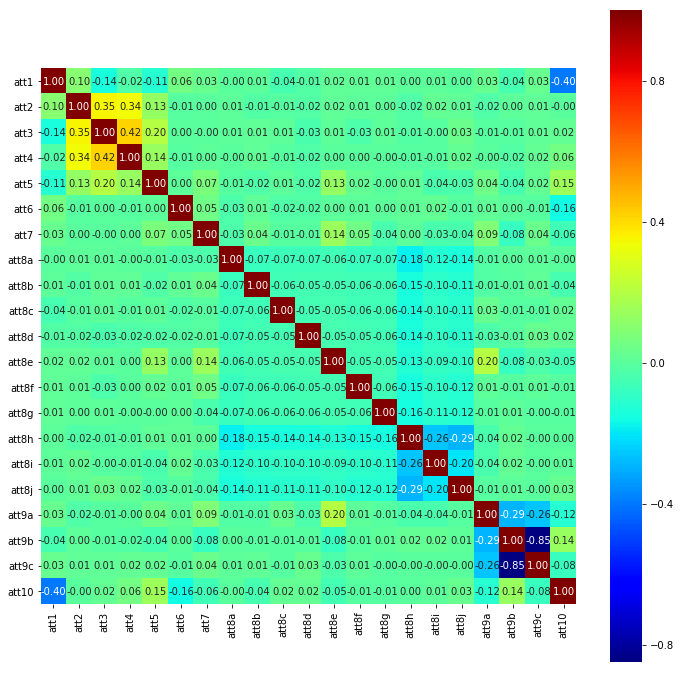

In [12]:
plt.figure(figsize = (12,12))
sns.heatmap(train_df.corr(), annot = True, square = True, fmt = '0.2f', cmap = 'jet')
plt.show()

### Correlation to Target
There are only 5 variables that are highly correlated to the target, those are **(blue, negatively correlated; red, positively correlated)**:
- <span style="color:blue"> **att1** </span>
- <span style="color:blue"> **att6** </span>
- <span style="color:blue"> **att9a** </span>
- <span style="color:red"> **att9b** </span>
- <span style="color:red"> **att5** </span>  

The rest have very low correlation to the target (< 0.1).

In [13]:
def plot_correlation_color(df, target):
    plt.figure(figsize = (7,7))
    plt.title('Correlation Values w.r.t Target')
    correlation = df.corr()[target].sort_values()
    limit = 0.1
    mask_red = (correlation > limit)
    mask_green = (correlation <= limit) & (correlation >= -limit)
    mask_blue = (correlation < -limit)
    plt.bar(correlation[mask_blue].index, correlation[mask_blue], color = 'blue')
    plt.bar(correlation[mask_green].index, correlation[mask_green], color = 'green')
    plt.bar(correlation[mask_red].index, correlation[mask_red], color = 'red')
    plt.ylabel('Correlation Coefficient')
    plt.xticks(rotation = 90)
    plt.legend(labels = [('x <' + str(-limit)), (str(-limit) + '<= x <=' + str(limit)), ('x >' + str(limit))])
    plt.show()

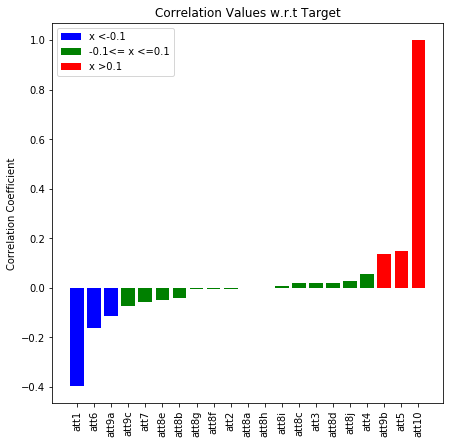

In [14]:
plot_correlation_color(train_df, 'att10')

## Modeling & Evaluation
### Train & Test Definition

In [15]:
X = train_df.drop(columns = ['att10'], axis = 1)
y = train_df['att10']
print('Your X size %i x %i' %(X.shape))
print('Your y size %i x 1' %(y.shape))

Your X size 8000 x 20
Your y size 8000 x 1


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
X_valid = valid_df
print('Your X_valid size %i x %i' %(X_valid.shape))

Your X_valid size 2000 x 20


### Supervised Learning
Morking with the labels and creating models.

#### K-Nearest Neighbors

In [19]:
from sklearn.neighbors import KNeighborsClassifier

##### Model

In [20]:
model_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

In [21]:
model_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

##### Evaluation

In [22]:
from sklearn.metrics import roc_auc_score

In [23]:
knn_auc_train = roc_auc_score(y_train, model_knn.predict(X_train))
knn_auc_test = roc_auc_score(y_test, model_knn.predict(X_test))

In [24]:
print('Your AUC score on train is %.4f' % knn_auc_train)
print('Your AUC score on test is %.4f' % knn_auc_test)

Your AUC score on train is 0.9436
Your AUC score on test is 0.9262


#### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

##### Model

In [26]:
model_logit = LogisticRegression()

In [27]:
model_logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

##### Evaluation

In [28]:
logit_auc_train = roc_auc_score(y_train, model_logit.predict(X_train))
logit_auc_test = roc_auc_score(y_test, model_logit.predict(X_test))

In [29]:
print('Your AUC score on train is %.4f' % logit_auc_train)
print('Your AUC score on test is %.4f' % logit_auc_test)

Your AUC score on train is 0.6751
Your AUC score on test is 0.6753


#### Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

##### Model

In [31]:
model_rf = RandomForestClassifier(criterion = 'entropy')

In [32]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

##### Evaluation

In [33]:
rf_auc_train = roc_auc_score(y_train, model_rf.predict(X_train))
rf_auc_test = roc_auc_score(y_test, model_rf.predict(X_test))

In [34]:
print('Your AUC score on train is %.4f' % rf_auc_train)
print('Your AUC score on test is %.4f' % rf_auc_test)

Your AUC score on train is 0.9956
Your AUC score on test is 0.9601


#### XG-Boost

In [35]:
from xgboost import XGBClassifier

##### Model

In [36]:
model_xgb = XGBClassifier()

In [37]:
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

##### Evaluation

In [38]:
xgb_auc_train = roc_auc_score(y_train, model_xgb.predict(X_train))
xgb_auc_test = roc_auc_score(y_test, model_xgb.predict(X_test))

In [39]:
print('Your AUC score on train is %.4f' % xgb_auc_train)
print('Your AUC score on test is %.4f' % xgb_auc_test)

Your AUC score on train is 0.9577
Your AUC score on test is 0.9656


#### Stacking Model

In [40]:
from mlxtend.classifier import StackingClassifier

##### Model

In [41]:
clf_meta = LogisticRegression()

In [42]:
clf_stack = StackingClassifier(classifiers = [model_knn, model_logit, model_rf, model_xgb],
                               meta_classifier = clf_meta,
                               use_probas = False,
                               use_features_in_secondary = False)

In [43]:
clf_stack.fit(X_train, y_train)

StackingClassifier(average_probas=False,
          classifiers=[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'), LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10...,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)],
          drop_last_proba=False,
          meta_classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          store_train_meta_features=False, use_clones=True,
          use_features_in_secondary=False, use_probas=False, verbose=0)

##### Evaluation

In [44]:
clf_stack_auc_train = roc_auc_score(y_train, clf_stack.predict(X_train))
clf_stack_auc_test = roc_auc_score(y_test, clf_stack.predict(X_test))

In [45]:
print('Your AUC score on train is %.4f' % clf_stack_auc_train)
print('Your AUC score on test is %.4f' % clf_stack_auc_test)

Your AUC score on train is 0.9967
Your AUC score on test is 0.9658


### Conclusion on Supervised Learning Methods
The summary of AUC scores (on test dataset) can be presented as a table below:

| Model               | AUC Score |
|---------------------|-----------|
| K-Nearest Neighbors | 0.9262    |
| Logistic Regression | 0.6753    |
| Random Forest       | 0.9601    |
| XGBoost             | 0.9656    |
| Stacked Model       | 0.9658    |

Since, I am using random seed 69, the best performance model is resulted from the Stacked Model. Nevertheless, the performance is still comparable to the Random Forest model. Therefore, if we would like to have a much simpler model, I would suggest to use Random Forest or XGBoost instead of Stacking Model.

**Important Note:**
_At the moment 10.000 observations generate no significant difference in model performances (K-NN, RF, XGB, and Stack). Further analysis is needed if there are more observations available. Therefore, we could examine the impact of more complex model to the classification performances._

#### Predicting Test Dataset

In [46]:
y_pred = clf_stack.predict_proba(X_valid)

In [47]:
y_pred_df = pd.DataFrame({'prediction' : y_pred[:,1]})
y_pred_df.to_csv('prediction_result_tri.csv')

### Unsupervised Learning

In [48]:
X = train_df[['att1','att2']]

In [49]:
X_valid = valid_df[['att1','att2']]

In [50]:
X_all = pd.concat([X, X_valid], axis = 0)

#### K-Means Clustering

In [51]:
from sklearn.cluster import KMeans

##### K-decision
Based on the elbow function, I decided to choose the **value of neighbors = 5** to maintain the information efficiency. 

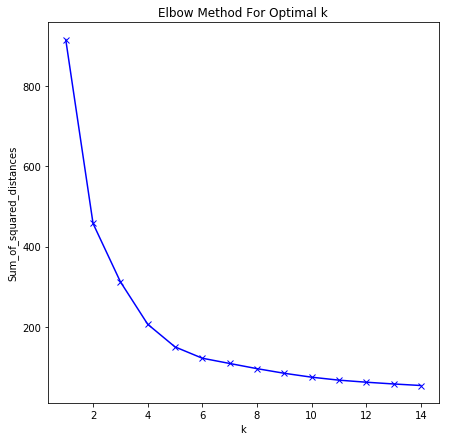

In [52]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_all)
    Sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize = (7,7))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

##### Model

In [53]:
model_kmeans = KMeans(n_clusters = 5)

In [54]:
model_kmeans.fit(X_all)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [55]:
X_all['label_kmeans'] = model_kmeans.labels_

##### Evaluation

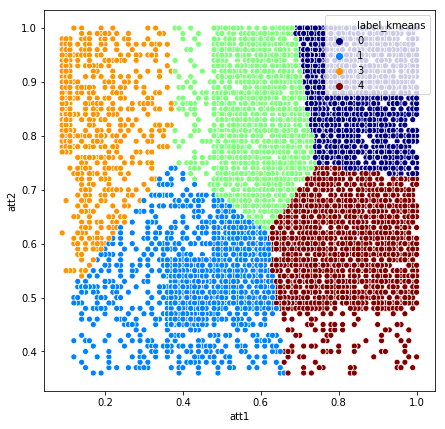

In [56]:
plt.figure(figsize = (7,7))
sns.scatterplot(x = 'att1', y = 'att2', data = X_all, hue = 'label_kmeans', palette = 'jet')
plt.legend(loc = 'upper right')
plt.show()

#### Hierarchical Clustering

In [57]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

##### Model

In [58]:
model_hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

In [59]:
model_hc.fit(X_all)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=5,
            pooling_func='deprecated')

In [60]:
X_all['label_hc'] = model_hc.labels_

##### Evaluation

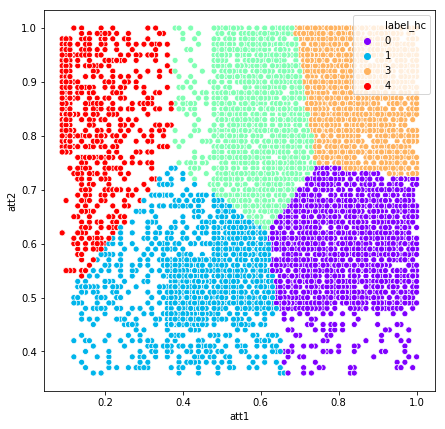

In [61]:
plt.figure(figsize = (7,7))
sns.scatterplot(x = 'att1', y = 'att2', data = X_all, hue = 'label_hc', palette = 'rainbow')
plt.legend(loc = 'upper right')
plt.show()

#### DBSCAN

In [62]:
from sklearn.cluster import DBSCAN

##### Model

In [63]:
model_dbscan = DBSCAN(eps = 0.5, min_samples = 5)

In [64]:
model_dbscan.fit(X_all)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

In [65]:
X_all['label_dbscan'] = model_dbscan.labels_

##### Evaluation

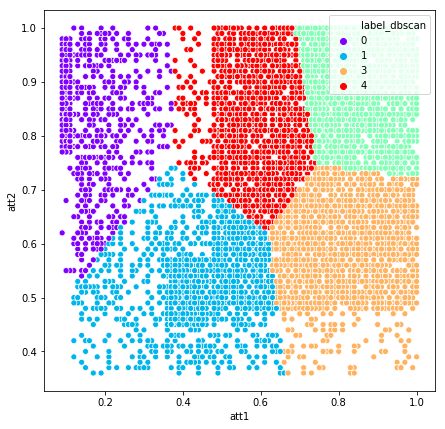

In [66]:
plt.figure(figsize = (7,7))
sns.scatterplot(x = 'att1', y = 'att2', data = X_all, hue = 'label_dbscan', palette = 'rainbow')
plt.legend(loc = 'upper right')
plt.show()

### Conclusion on Unsupervised Learning
The three methods (K-means, Hierachical, and DBSCAN) result more or less similar clusters eventhough each of them have different parameters to specify with. Here, I used **5 clusters** as the parameter of K-means and Hierarchical and standard **epsilon = 0.5** and **min_samples = 5** for DBSCAN. Looking at the figures below, the differences are not significant. All three methods performs well in clustering the dataset based on **att1** and **att2**. Even the proportion of each cluster and the labelled results are very much the same for each method. _(Please consider using this table below to refer the cluster labels)._

| Model                   | Cluster 1 | Cluster 2 | Cluster 3 | Cluster 4 | Cluster 5 |
|-------------------------|-----------|-----------|-----------|-----------|-----------|
| K-Means Clustering      | 0         | 1         | 4         | 2         | 3         |
| Hierarchical Clustering | 3         | 1         | 0         | 2         | 4         |
| DBSCAN Algorithm        | 2         | 1         | 3         | 4         | 0         |

with the definition of each cluster:
- Cluster 1: Employees who have <span style="color:red"> **high** </span> satisfaction with the company and produce <span style="color:red"> **high** </span> level of results.
- Cluster 2: Employees who have <span style="color:blue"> **low** </span> satisfaction with the company and produce <span style="color:blue"> **low** </span> level of results.
- Cluster 3: Employees who have <span style="color:red"> **high** </span> satisfaction with the company but produce <span style="color:blue"> **low** </span> level of results.
- Cluster 4: Employees who have <span style="color:green"> **medium** </span> satisfaction with the company and produce <span style="color:red"> **high** </span> level of results.
- Cluster 5: Employees who have <span style="color:blue"> **low** </span> satisfaction with the company but produce <span style="color:red"> **high** </span> level of results.

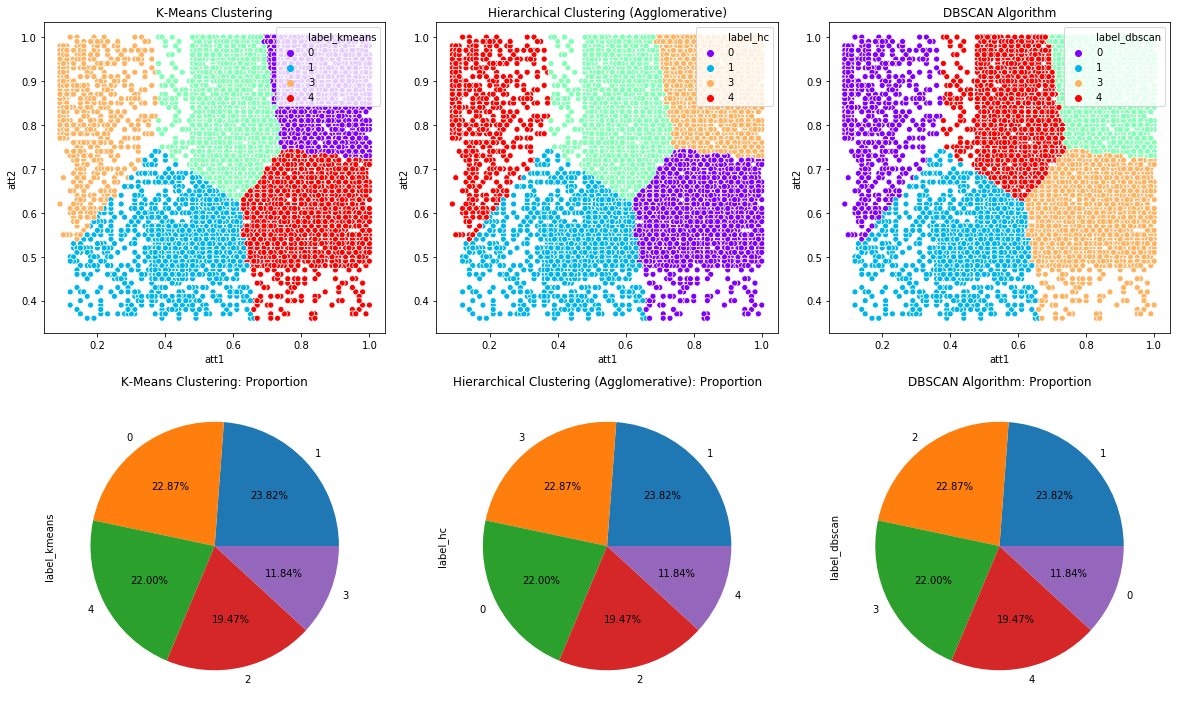

In [67]:
plt.figure(figsize = (16.5,10))
plt.subplot(2,3,1)
sns.scatterplot(x = 'att1', y = 'att2', data = X_all, hue = 'label_kmeans', palette = 'rainbow')
plt.legend(loc = 1)
plt.title('K-Means Clustering')

plt.subplot(2,3,2)
sns.scatterplot(x = 'att1', y = 'att2', data = X_all, hue = 'label_hc', palette = 'rainbow')
plt.legend(loc = 1)
plt.title('Hierarchical Clustering (Agglomerative)')

plt.subplot(2,3,3)
sns.scatterplot(x = 'att1', y = 'att2', data = X_all, hue = 'label_dbscan', palette = 'rainbow')
plt.legend(loc = 1)
plt.title('DBSCAN Algorithm')

plt.subplot(2,3,4)
X_all['label_kmeans'].value_counts().plot.pie(autopct = '%.2f%%')
plt.title('K-Means Clustering: Proportion')

plt.subplot(2,3,5)
X_all['label_hc'].value_counts().plot.pie(autopct = '%.2f%%')
plt.title('Hierarchical Clustering (Agglomerative): Proportion')

plt.subplot(2,3,6)
X_all['label_dbscan'].value_counts().plot.pie(autopct = '%.2f%%')
plt.title('DBSCAN Algorithm: Proportion')

plt.tight_layout()
plt.savefig('unsupervised_learning.png')
plt.show()